### Ex3A : Classification


In [28]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

1. Load a labelled dataset [CSV file] that contains both numerical and categorical
attributes and print its shape.

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Datasets/Ex3A/train.csv")
train.shape

(2000, 21)

2. Display how many data samples of each class is in the data set.

In [4]:
display(train["price_range"].value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

3. Visualize the data by plotting the attributes.

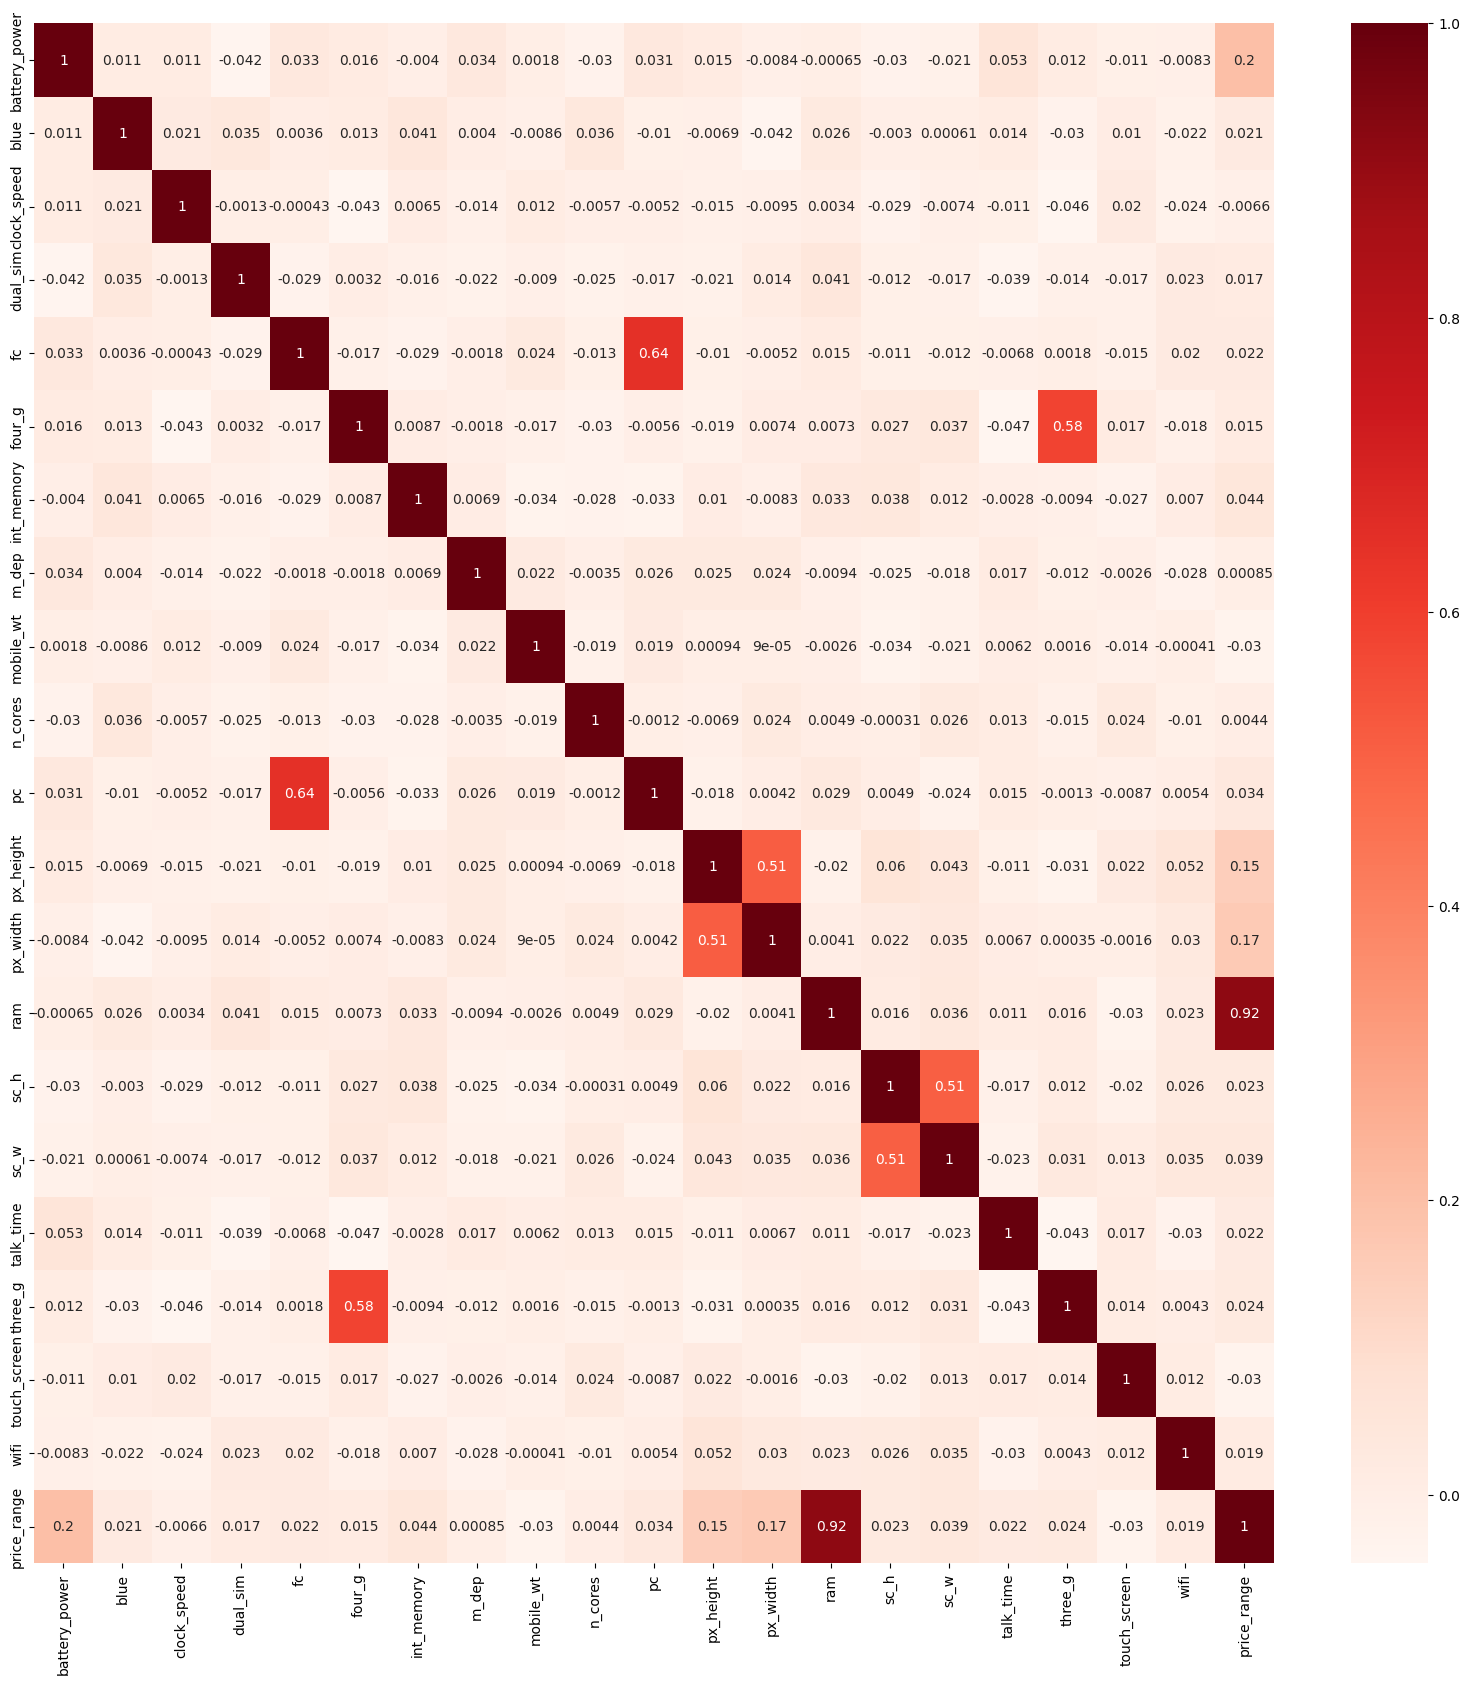

In [5]:
import seaborn as sns
corr = train.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

4. Preprocessing
* a. Perform feature selection by using the inference made from data visualization.
* b. Normalize the data

In [6]:
target_corr = abs(corr["price_range"])
features = target_corr[target_corr > 0.1]
features

battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

In [7]:
pearson_corr = train.corr(method='pearson')
pearson_target_corr = pearson_corr["price_range"]
print(f"Features from Pearson Method : \n{pearson_target_corr[pearson_target_corr > 0.1]}")

kendall_corr = train.corr(method='kendall')
kendall_target_corr = pearson_corr["price_range"]
print(f"Features from Kendall Method : \n{kendall_target_corr[kendall_target_corr > 0.1]}")

spearman_corr = train.corr(method='spearman')
spearman_target_corr = pearson_corr["price_range"]
print(f"Features from Pearson Method : {spearman_target_corr[spearman_target_corr > 0.1]}")

Features from Pearson Method : 
battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64
Features from Kendall Method : 
battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64
Features from Pearson Method : battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64


In [8]:
# Selecting the Features based on Pearson Method
reduced_train = train[['battery_power', 'px_height', 'px_width', 'ram', 'price_range']]
reduced_train.shape

(2000, 5)

In [9]:
# Normalizing the data using MinMax Normalisation
def minMaxScaler(column) :
  return (column - column.min()) / (column.max()-column.min())
reduced_train.iloc[:, :-1] = reduced_train.iloc[:, :-1].apply(minMaxScaler)

<ipython-input-9-bafee1185f9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train.iloc[:, :-1] = reduced_train.iloc[:, :-1].apply(minMaxScaler)


In [10]:
reduced_train.head()

,battery_power,px_height,px_width,ram,price_range
0,0.227789,0.010204,0.170895,0.612774,1
1,0.347361,0.461735,0.993324,0.634687,2
2,0.041416,0.644388,0.811749,0.627205,2
3,0.076152,0.620408,0.858478,0.671566,2
4,0.881764,0.616327,0.475300,0.308658,1


5. Use the training set to build an accurate model. Then use the test set (Obtained by
splitting train.csv data into train and test) to report the accuracy of the model You
should use the following algorithm:
a. Decision Tree Algorithm
* i. Perform 80-20 split
* ii. Plot the entire Decision Tree
* iii. Change the attribute selection measure and plot the decision tree
* iv. Specify the maximum depth of the tree and plot the pruned tree.

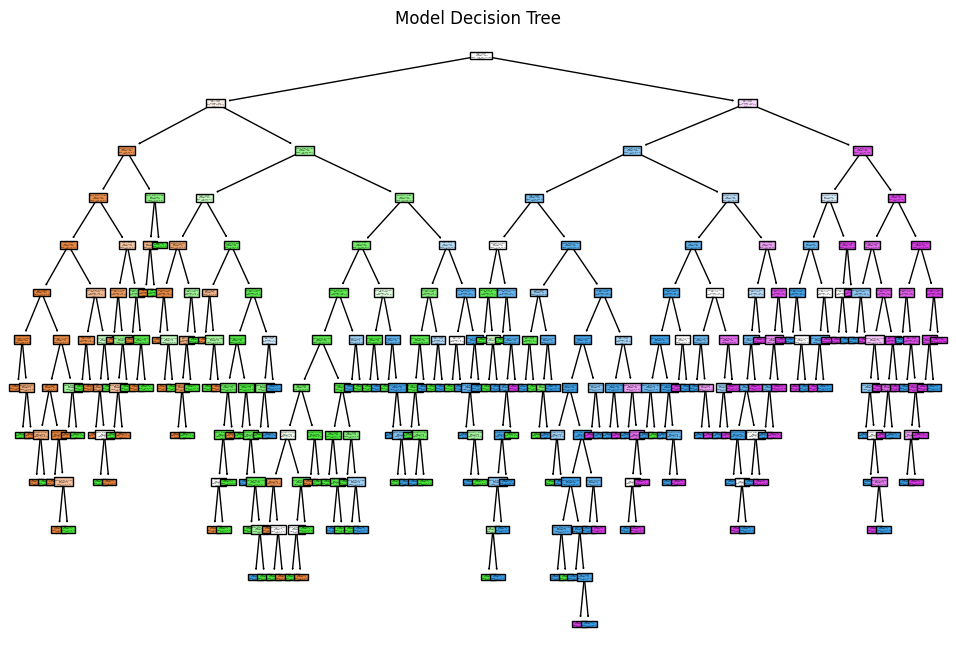

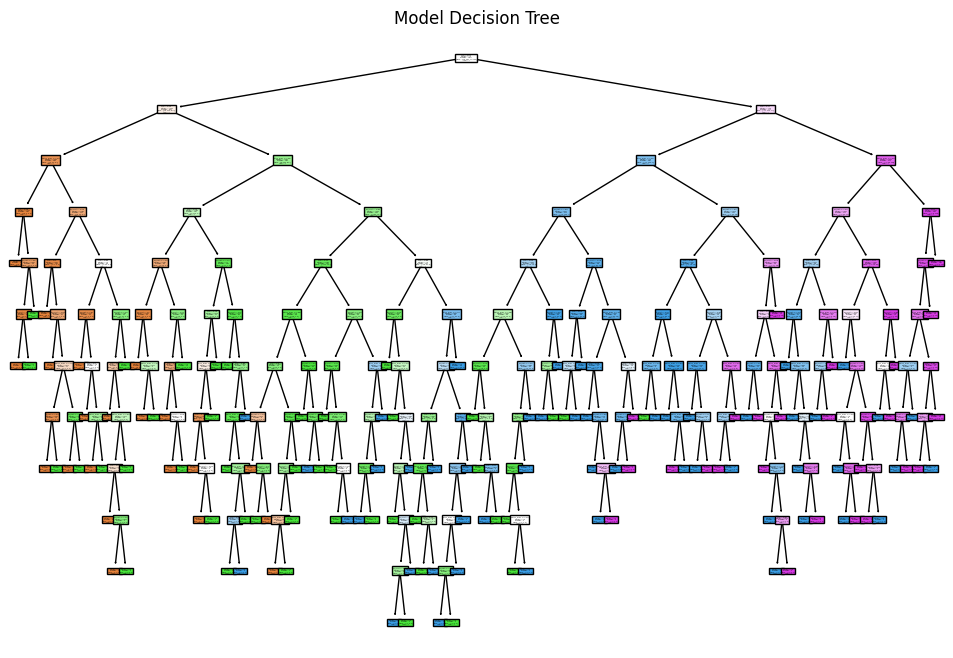

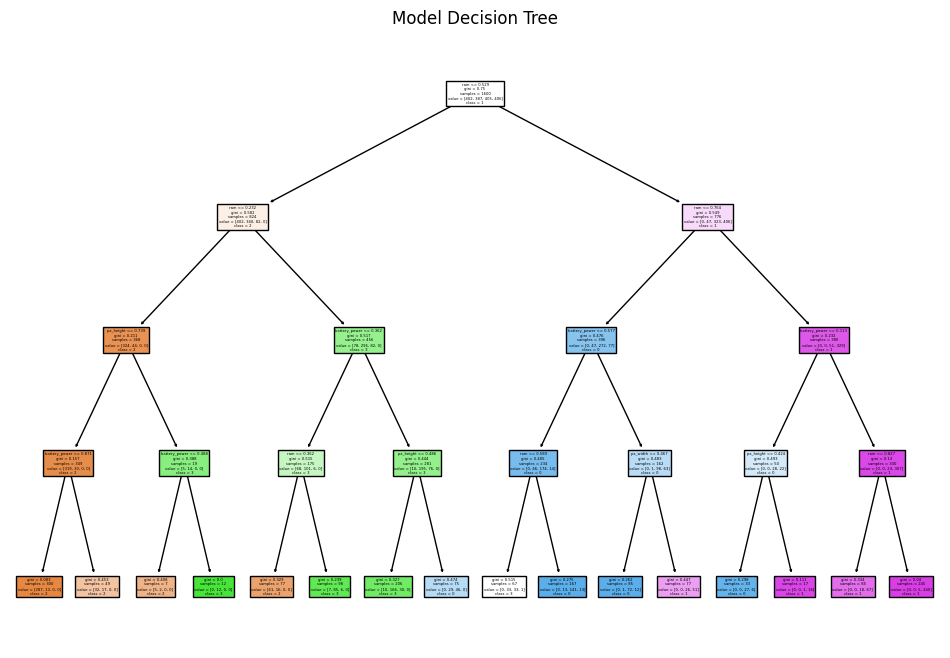

In [16]:
# i. Perform 80-20 Split
X = reduced_train.iloc[:, :-1]
y = reduced_train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
class_names = [str(x) for x in y_train.unique()]


def plot_decision_tree(model, features, class_names, title) :
  plt.figure(figsize=(12, 8))
  plot_tree(model, filled=True, feature_names = features, class_names=class_names)
  plt.title(title)
  plt.show()

# ii. Plot the decision tree
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)
plot_decision_tree(model_1, X.columns, class_names, "Decision Tree")

#iii. Change the attribute selection measure and plot the decision tree
model_2 = DecisionTreeClassifier(criterion='entropy')
model_2.fit(X_train, y_train)
plot_decision_tree(model_2, X.columns, class_names, "Entropy Seleceted Decision Tree")

#iv. Specify the maximum depth of the tree and plot the pruned tree.
model_3 = DecisionTreeClassifier(max_depth=4)
model_3.fit(X_train, y_train)
plot_decision_tree(model_3, X.columns, class_names, "Pruned Decision Tree")

6. Evaluate the model using test set (test.csv)

In [29]:
#Model 1
model_1_y_pred = model_1.predict(X_test)
model_1_acc = accuracy_score(model_1_y_pred, y_test)
print(f"Model_1 Accuracy : {model_1_acc * 100 :2.2f}%")

#Model 2
model_2_y_pred = model_2.predict(X_test)
model_2_acc = accuracy_score(model_2_y_pred, y_test)
print(f"Model_2 Accuracy : {model_2_acc * 100 :2.2f}%")

#Model 3
model_3_y_pred = model_3.predict(X_test)
model_3_acc = accuracy_score(model_3_y_pred, y_test)
print(f"Model_3 Accuracy : {model_3_acc * 100 :2.2f}%")

Model_1 Accuracy : 86.50%
Model_2 Accuracy : 90.25%
Model_3 Accuracy : 76.75%


7. Report the performance of the built model using different evaluation metrics such as
precision, recall and F1-score.

In [37]:
report = list()

def state_dict(model_name, y_pred, y_test) :
  return {
    "Model" : model_name,
    "Accuracy" : accuracy_score(y_pred, y_test),
    "Precision" : precision_score(y_pred, y_test, average='macro'),
    "Recall" : recall_score(y_pred, y_test, average='macro'),
    "F1 Score" : f1_score(y_pred, y_test, average='macro')
  }
#Model 1
model_1_dict = state_dict("Model_1", model_1_y_pred, y_test)
report.append(model_1_dict)

#Model 2
model_2_dict = state_dict("Model_2", model_2_y_pred, y_test)
report.append(model_2_dict)

#Model 3
model_3_dict = state_dict("Model_3", model_3_y_pred, y_test)
report.append(model_3_dict)

report = pd.DataFrame(report)
print("Report")
display(report)




Report


,Model,Accuracy,Precision,Recall,F1 Score
0,Model_1,0.8650,0.867876,0.866900,0.866783
1,Model_2,0.9025,0.902347,0.903489,0.902849
2,Model_3,0.7675,0.770830,0.760472,0.762848
